In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time, random, requests, json

In [2]:
#*   Prohibits truncatation of data in prints.
pd.set_option('display.max_colwidth', -1)
    
df = pd.read_csv("/Users/nicolespaar/Desktop/combinedData_NEW.csv", dtype={'TCONST': str,
                                                                   'TITLE': str,
                                                                   'YEAR': float,
                                                                   'BECHDEL': float,
                                                                   'SCORES': float,
                                                                   'VOTES': float,
                                                                   'BUDGETS': float,
                                                                   'RELEASED_DAY': float,
                                                                   'RELEASED_MON': float,
                                                                   'RELEASED_YEAR': float,
                                                                   'WINNER': float,
                                                                   'COUNTRY': float},
                low_memory=False)
df = df.drop(['Unnamed: 0'], axis=1).copy()

In [3]:
alternate_df = df.drop(['TCONST', 'TITLE'], axis=1).copy()

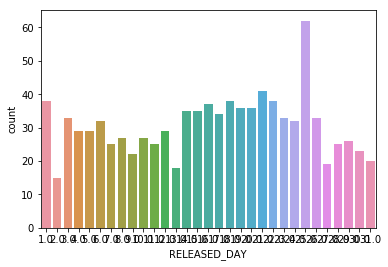

In [4]:
# This shows the spread of what days of the month all of the movies were released at their
# premieres. There appear to be distinct peaks and valleys that correlate.
barChart = sns.countplot(x='RELEASED_DAY', data=df)

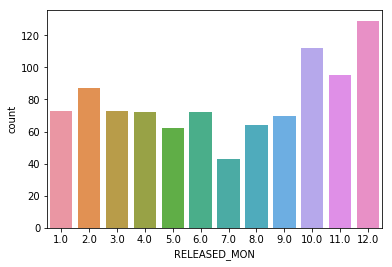

In [5]:
# There also appear to be peaks and valleys defined correlating to which month each of the
# movies were released at their premieres.
barChart = sns.countplot(x='RELEASED_MON', data=df)

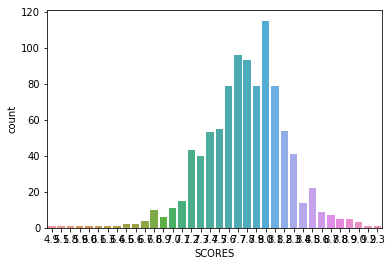

In [6]:
# Here you can see the distribution of all of the movies' scores via IMdB's user rating.
barChart = sns.countplot(x='SCORES', data=df)

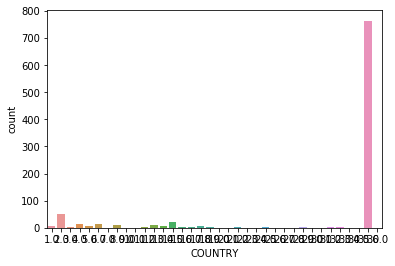

In [7]:
# The United States absolutely  d o m i n a t e s  the film industry in number of releases and
# Academy Award winning quality content alike.
barChart = sns.countplot(x='COUNTRY', data=df)

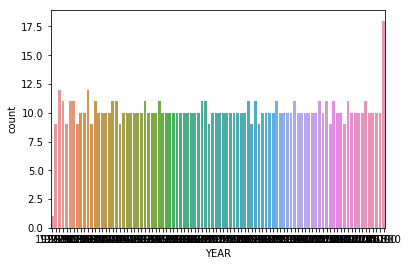

In [8]:
# Here you can see the even distribution/spread of movies in my dataset between 1926 and 2019.
barChart = sns.countplot(x='YEAR', data=df)

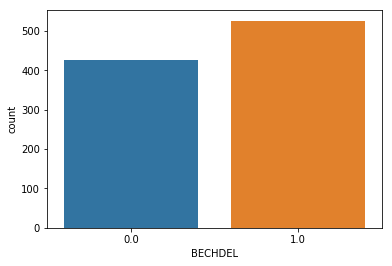

In [9]:
# This barchart compares all entries in my dataset for their Bechdel Test validation. More
# films pass the Bechdel Test than do not (Orange bar is 'passing').
barChart = sns.countplot(x='BECHDEL', data=df)

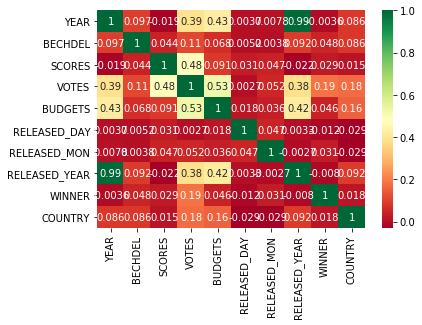

In [10]:
# All features are put to a correlation heatmap.
heatMap = sns.heatmap(df[['YEAR', 'BECHDEL', 'SCORES', 'VOTES', 'BUDGETS', 'RELEASED_DAY', 'RELEASED_MON', 'RELEASED_YEAR', 'WINNER', 'COUNTRY']].corr(),cmap='RdYlGn',annot=True)

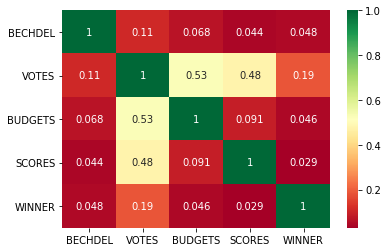

In [11]:
# This is a selection of features that interests me most in the way of correlation.
heatMap = sns.heatmap(df[['BECHDEL', 'VOTES', 'BUDGETS', 'SCORES', 'WINNER']].corr(),cmap='RdYlGn',annot=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


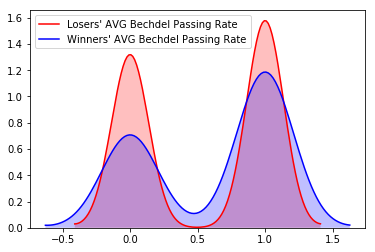

In [12]:
bechFail = df[df.WINNER == 0].BECHDEL
bechPass = df[df.WINNER == 1].BECHDEL

g = sns.kdeplot(bechFail, legend = True, shade=True, color='r', label = 'Losers\' AVG Bechdel Passing Rate')
g = sns.kdeplot(bechPass, legend = True, shade=True, color='b', label = 'Winners\' AVG Bechdel Passing Rate')

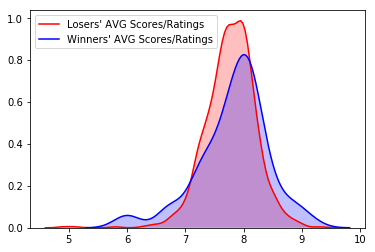

In [13]:
x = df[df.WINNER == 0].SCORES
y = df[df.WINNER == 1].SCORES

g = sns.kdeplot(x, legend = True, shade=True, color='r', label = 'Losers\' AVG Scores/Ratings')
g = sns.kdeplot(y, legend = True, shade=True, color='b', label = 'Winners\' AVG Scores/Ratings')

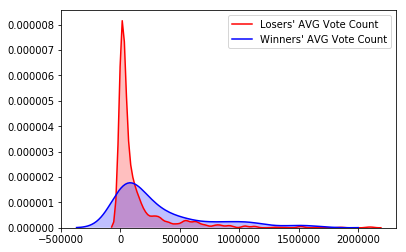

In [14]:
x = df[df.WINNER == 0].VOTES
y = df[df.WINNER == 1].VOTES

g = sns.kdeplot(x, legend = True, shade=True, color='r', label = 'Losers\' AVG Vote Count')
g = sns.kdeplot(y, legend = True, shade=True, color='b', label = 'Winners\' AVG Vote Count')

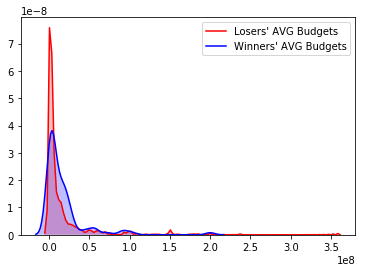

In [15]:
x = df[df.WINNER == 0].BUDGETS
y = df[df.WINNER == 1].BUDGETS

g = sns.kdeplot(x, legend = True, shade=True, color='r', label = 'Losers\' AVG Budgets')
g = sns.kdeplot(y, legend = True, shade=True, color='b', label = 'Winners\' AVG Budgets')

Germany and France are representing a good amount of the distribution, 
but they just aren't bringing home those Wins like 'Murica.


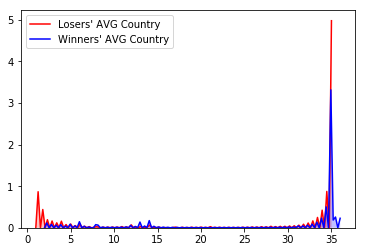

In [16]:
x = df[df.WINNER == 0].COUNTRY
y = df[df.WINNER == 1].COUNTRY

g = sns.kdeplot(x, legend = True, shade=True, color='r', label = 'Losers\' AVG Country')
g = sns.kdeplot(y, legend = True, shade=True, color='b', label = 'Winners\' AVG Country')
print("Germany and France are representing a good amount of the distribution, \nbut they just aren't bringing home those Wins like 'Murica.")

#        'USA': 35,
#        'Germany': 1,
#        'France': 2,
#        'Denmark': 3,
#        'Sweden': 4,
#        'Argentina': 5,
#        'Japan': 6,
#        'Portugal': 7,
#        'Brazil': 8,
#        'Uruguay': 9,
#        'Scotland': 10,
#        'Finland': 11,
#        'Italy': 12,
#        'Australia': 13,
#        'UK': 14,
#        'West': 15,
#        'India': 16,
#        'West Germany': 1,
#        'Soviet': 17,
#        'Czechoslovakia': 18,
#        'USSR': 17,
#        'Canada': 19,
#        'Spain': 20,
#        'Poland': 21,
#        'Iceland': 22,
#        'Serbia': 23,
#        'Hungary': 24,
#        'Greece': 25,
#        'Taiwan': 26,
#        'Ireland': 27,
#        'South': 28,
#        'Romania': 29,
#        'Israel': 30,
#        'Belgium': 31,
#        'Iran': 32,
#        'Russia': 17,
#        'Philippines': 33,
#        'Lebanon': 34

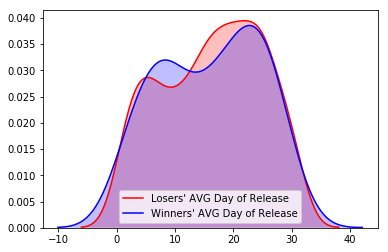

In [17]:
x = df[df.WINNER == 0].RELEASED_DAY
y = df[df.WINNER == 1].RELEASED_DAY

g = sns.kdeplot(x, legend = True, shade=True, color='r', label = 'Losers\' AVG Day of Release')
g = sns.kdeplot(y, legend = True, shade=True, color='b', label = 'Winners\' AVG Day of Release')

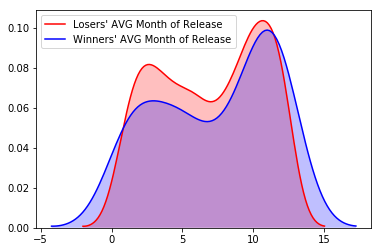

In [18]:
x = df[df.WINNER == 0].RELEASED_MON
y = df[df.WINNER == 1].RELEASED_MON

g = sns.kdeplot(x, legend = True, shade=True, color='r', label = 'Losers\' AVG Month of Release')
g = sns.kdeplot(y, legend = True, shade=True, color='b', label = 'Winners\' AVG Month of Release')

In [19]:
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #

In [20]:
X = alternate_df[alternate_df.columns.difference(['WINNER'])]
y = df['WINNER']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.325, 
                                                    train_size=0.675, 
                                                    random_state=420, 
                                                    shuffle=True, 
                                                    stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(0.98)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

#logisticRegr = LogisticRegression(solver = 'liblinear')
#logisticRegr.fit(X_train, y_train)

logisticRegr = LogisticRegression(penalty='elasticnet', multi_class='ovr', n_jobs=-1, l1_ratio=0, random_state=69, solver='saga', max_iter=50000, verbose=10)
logisticRegr.fit(X_train, y_train)

convergence after 41 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=50000,
                   multi_class='ovr', n_jobs=-1, penalty='elasticnet',
                   random_state=69, solver='saga', tol=0.0001, verbose=10,
                   warm_start=False)

In [25]:
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test), "\n")
print(y_test.index)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Int64Index([108, 758,   4, 684, 354, 170, 611, 584, 43

In [26]:
logisticRegr.score(X_train, y_train)

0.9034267912772586

In [27]:
logisticRegr.score(X_test, y_test)

0.9

In [28]:
from sklearn.metrics import confusion_matrix
import math

tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

print(f"Total - Y_Test: {len(y_test)}")
print(f"Total - Predicted: {len(predicted)}\n")

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}\n")

sensitivity = tp/(tp+fn)
print(f"Sensetivity / True Positive Rate: {sensitivity}\n")

specificity = tn/(tn+fp)
print(f"Specificity / True Negative Rate: {specificity}\n")

precision = tp/(tp+fp)
print(f"Precision / Positive Predictive Value: {precision}\n")

npv = tn/(tn+fn)
print(f"Negative Predictive Value: {npv}\n")

miss_rate = fn/(fn+tp)
print(f"Miss Rate / False Negative Rate: {miss_rate}\n")

fall_out = fp/(fp+tn)
print(f"Fall-Out / False Positive Rate: {fall_out}\n")

fdr = fp/(fp+tp)
print(f"False Discovery Rate: {fdr}\n")

fOMr = fn/(fn+tn)
print(f"False Omission Rate: {fOMr}\n")

threat_score = tp/(tp+fn+fp)
print(f"Threat Score / Critical Success Index: {threat_score}\n")

accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Accuracy: {accuracy}\n")

f1_score = (2*tp)/((2*tp)+fp+fn)
print(f"F1 Score / Harmonic Mean of Precision(PPV) and Sensetivity(TPR): {f1_score}\n")

mcc = ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"Matthews Correlation Coefficient: {mcc}\n")

informedness = (sensitivity+specificity-1)
print(f"Informedness / Bookmaker Informedness: {informedness}\n")

markedness = (precision+npv-1)
print(f"Markedness: {markedness}")

Total - Y_Test: 310
Total - Predicted: 310

True Negatives: 279
False Positives: 1
False Negatives: 30
True Positives: 0

Sensetivity / True Positive Rate: 0.0

Specificity / True Negative Rate: 0.9964285714285714

Precision / Positive Predictive Value: 0.0

Negative Predictive Value: 0.9029126213592233

Miss Rate / False Negative Rate: 1.0

Fall-Out / False Positive Rate: 0.0035714285714285713

False Discovery Rate: 1.0

False Omission Rate: 0.0970873786407767

Threat Score / Critical Success Index: 0.0

Accuracy: 0.9

F1 Score / Harmonic Mean of Precision(PPV) and Sensetivity(TPR): 0.0

Matthews Correlation Coefficient: -0.018620973068096465

Informedness / Bookmaker Informedness: -0.0035714285714285587

Markedness: -0.09708737864077666


In [29]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=4)
sumAccuracy = []
for train,test in skf.split(X,y):
    df_train = alternate_df.iloc[train]
    df_test = alternate_df.iloc[test]
    train_X = df_train[alternate_df.columns.difference(['WINNER'])]
    train_y = df_train['WINNER']
    test_X = df_test[alternate_df.columns.difference(['WINNER'])]
    test_y = df_test['WINNER']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 6874 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 7045 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 8012 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3362 epochs took 0 seconds
0.9044153438081974


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(random_state=420)

sumAccuracy = []
for train,test in sss.split(X,y):
    df_train = alternate_df.iloc[train]
    df_test = alternate_df.iloc[test]
    train_X = df_train[alternate_df.columns.difference(['WINNER'])]
    train_y = df_train['WINNER']
    test_X = df_test[alternate_df.columns.difference(['WINNER'])]
    test_y = df_test['WINNER']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(f"\n\n3-Fold Cross Validation Mean Score: {avg}\n\n")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 6946 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 7013 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 6953 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 7295 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 6977 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 6965 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 7041 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 7133 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 6972 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 7131 epochs took 1 seconds


3-Fold Cross Validation Mean Score: 0.90625




[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


In [31]:
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #
# X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X #
# - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - X - #

In [32]:
#!---- ---- ---- ---- From the Past ---- ---- ---- ----!#

def init_splinter():
    '''
    init_splinter() initializes a selenium chrome webdriver using a Tor proxy and returns it
    as a splinter browser wrapped object.
    '''
    executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
    browser = Browser('chrome', **executable_path, headless=False, incognito=True)
    return browser



def simmer_soup():
    '''
    simmer_soup() receives the browser object and returns the current page's parsed html as "Soup".
    '''
    html = browser.html
    soup = bs(html, 'html.parser')
    return html, soup

#!---- ---- ---- ---- From Scratch ---- ---- ---- ----!#

bechdel_base = "http://bechdeltest.com/api/v1/getMoviesByTitle?title="
bechdel_bools = []

def callAPI(movieToSearch):
    '''
    callAPI() calls the above url (Bechdel test API) with a movie title argument. The
    response is returned as a JSON in a variable ($conn). If the length of the response
    is less than or equal to 2, the response is a False (Either hasn't been Bechdel rated,
    or is rated a False for passing) and a 0 is returned. Else a True 1 is returned.
    '''
    conn = str(requests.get(bechdel_base + movieToSearch).json())
    if len(conn) <= 2:
        return 0
    else:
        return 1

def getRateLimit():
    '''
    getRateLimit() returns a random number between 2.66 and 6.33, rounded to 2 decimals 
    places. The result is used as a rate-limiter for our scraping calls as to slow down
    requests and not be rude to IMdB.
    '''
    return round(random.uniform(2.66, 6.33), 2)

titleBasics = pd.read_csv("/Users/nicolespaar/Desktop/titleBasics_spaar.csv", index_col='tconst', low_memory=False)

In [33]:
movieToSearch = str(input("Enter a movie title you'd like to make an Oscar's Best Picture Award prediction for... ")).lower()
movieYear = float(input(f"Enter {movieToSearch}'s 4-digit year of release... "))



scraped = []
throttle = getRateLimit()

# The downloaded IMdB database >> DataFrame is searched for the current iterration's movie.
titleBasicsArray = titleBasics[titleBasics['lowercasedTitle'] == movieToSearch]
titleBasicsRow_RAW = titleBasicsArray[titleBasicsArray['titleType'] == 'movie']
titleBasicsRow = titleBasicsRow_RAW[titleBasicsRow_RAW['startYear'] == str(movieYear)]
tconst = titleBasicsRow.index.to_list()
tconst_str = ''.join(tconst)
tconst_str = tconst_str[0:9]

# If the length of the result of the search's tconst string is NOT 0 (empty/no result
# found), then the associated details as well as the result of its Bechdel rating API
# caller are appended as a list. That list is then appended into the $scraped array.
if len(tconst_str) != 0:
    print(f"APPENDING info of: '{movieToSearch}' ({movieYear}) with a throttle of: {throttle}s")
    temp = []
    temp.append(movieToSearch)
    temp.append(tconst_str) 
    temp.append(movieYear)
    time.sleep(float(throttle / 2))
    bechdelBool = callAPI(movieToSearch)
    temp.append(bechdelBool)
    scraped.append(temp)  
        
# If the length of the result of the search's tconst string IS 0 (empty/no results found),
# then the needed details are scraped from IMdB's website.
else:
    print(f"   [!] SCRAPING info of: '{movieToSearch}' ({movieYear}) with a throttle of: {throttle}s")
    
    temp = []
    time.sleep(throttle)
        
    # The below URL can be used as an API of sorts by appending the $movieToSearch to it,
    # we must only replace the whitespace with a plus sign.
    base_url = "https://www.imdb.com/search/title/?title=" 
    movieToSearch = movieToSearch.replace(" ", "+")
    full_url = (base_url + movieToSearch)
    browser = init_splinter()
    browser.driver.minimize_window()
    browser.visit(full_url)
        
    # The results page is parsed with Beautifulsoup4 and a `soup` object returned. Then
    # the plus signs are replaced back with whitespace in our $movieToSearch. The `soup`
    # object is parsed and iterrated for the correct result that corresponds to the movie
    # we are after. Its <href> characters [7:16] are spliced as its `tconst` and appended
    # along with the rest of its associated information to a list. 
    html, soup = simmer_soup()
    movieToSearch = movieToSearch.replace("+", " ")
    results = soup.find_all('h3', class_='lister-item-header')
    for r in results:
        rYear = soup.select('h3 > span')[1].get_text(strip=True)
        rYear = rYear.replace("(", "")
        rYear = rYear.replace(")", "")
        if (r.a.text.lower() == movieToSearch) and movieToSearch not in temp:
            link_end = r.a['href']
            tconst_str = link_end[7:16]
            temp.append(movieToSearch)
            temp.append(tconst_str) 
            temp.append(movieYear)   
    browser.quit()
        
    #? The Bechdel rating for our new movie is acquired via the Bechdel callAPI() function,
    #? and appended to the rest of the information we scraped's list. Once complete, that
    #? list is then appended into the $scraped array.
    bechdelBool = callAPI(movieToSearch)
    temp.append(bechdelBool)
    scraped.append(temp)

Enter a movie title you'd like to make an Oscar's Best Picture Award prediction for... Toy Story 4
Enter toy story 4's 4-digit year of release... 2019
   [!] SCRAPING info of: 'toy story 4' (2019.0) with a throttle of: 3.1s


In [34]:
titleHolding = []
tconstHolding = []
yearHolding = []
bechdelHolding = []

# The scraped data and Bechdel scores are appended to arrays, then they're made into a dict 
# that is used to create a DataFrame.
for i in scraped:
    titleHolding.append(i[0])
    tconstHolding.append(i[1])
    yearHolding.append(i[2])
    bechdelHolding.append(i[3])

scraped_data = {'TCONST': titleHolding, 'TITLE': tconstHolding, 'YEAR': yearHolding, 'BECHDEL': bechdelHolding}
inputDF = pd.DataFrame(data=scraped_data)
inputDF

,TCONST,TITLE,YEAR,BECHDEL
0,toy story 4,tt1979376,2019.0,1


In [35]:
tconstDoOvers = []
titleDoOvers = []
yearDoOvers = []
bechdelDoOvers = []

def changeTCONST_LIST(NEW_tconst, CHECK_title, CHECK_year, CHECK_bechdel):
    tconstDoOvers.append(NEW_tconst)
    titleDoOvers.append(CHECK_title)
    yearDoOvers.append(int(CHECK_year - 1))
    bechdelDoOvers.append(CHECK_bechdel)
    
def clear():
    _ = call('clear' if os.name == 'posix' else 'cls')

In [36]:
# The below [empty] arrays declared are what we go and scrape for with the above created
# Dataframe of the user's input movie.
scores = []
votecount = []
budgets = []
companies = []
releasedDays = []
releasedMonths = []
releasedYears = []
releasedCountries = []

imdb_base = "https://www.imdb.com/title/"

count = 0
iterLength = len(tconstHolding)

for pk in tconstHolding:
    
    count += 1
    
    # A random amount of time to throttle our requests is generated for each `tconst` 
    # iterration. That `tconst` is concactenated onto the base IMdB movie page URL, and
    # it is then visited. That page's html is parsed with Beautifulsoup4 and a `soup`
    # object is returned.
    throttle = getRateLimit()
    imdb_end = pk
    url = (imdb_base + imdb_end)
    print(f"SCRAPE {count}/{iterLength}   >>>>   tconst: '{imdb_end}'   throttled by: {throttle}s   title: '{movieToSearch}'")
    time.sleep(throttle)
    browser = init_splinter()
    browser.visit(url)
    html, soup = simmer_soup()
    
    # The movie's ratings and vote count parent tag is extracted from the `soup` object and 
    # declared as $ratings.
    ratings_parent = soup.find('div', class_='ratingValue').strong['title']
    ratings = ratings_parent.split()
    
    # The movie's rating's score is appended to the current iterration's extraction list.
    score = ratings[0]
    scores.append(score)

    # The movie's rating's vote count is appended to the current iterration's extraction list.
    totalVotes = ratings[3]
    votecount.append(totalVotes.replace(",", ""))
    
    # Booleans for each of the troublesome features are declared as nil before attempting to
    # extract their associated categorical data from IMdB.
    budgetBOOL = False
    dayBOOL = False
    monthBOOL = False
    yearBOOL = False
    countryBOOL = False
    
    # The movie's certs parent tag is extracted from the `soup` object and declared as
    # $cert_raw. It is then iterrated through looking for <h4> tags' text that equal
    # `Budget`, `Production Co`, and `Release Date` to extract as attributes to append
    # as associated information/features of the dataset.
    cert_raw = soup.find_all('div', class_='txt-block')
    for cert in cert_raw:
        try:
            
            # If the `Budget` <h4> text is encountered within the iterration of the <div>s of
            # .txt-block, and if its length is not null, its Boolean is set to true and its
            # value from the 8th character on are appended to the current iterration's 
            # extraction list.
            if cert.h4.text == "Budget:":
                budget_RAW = cert.text.split()
                budget = budget_RAW[0]               
                if len(budget[8:]) != 0:
                    budgetBOOL = True
                    budgets.append(budget[8:].replace(",", ""))

            # If the `Production Co:` <h4> text is encountered within the iterration of the 
            # <div>s of .txt-block, its Boolean is set to true and its value from the 3rd 
            # indice/element on are appended to the current iterration's extraction list.
            elif cert.h4.text == "Production Co:":
                companies_RAW = cert.text.split()
                company = companies_RAW[2]            
                companies.append(company)   

            # If the `Production Co:` <h4> text is encountered within the iterration of the 
            # <div>s of .txt-block, its 3rd, 4th, and 5th indices/elements are extracted out
            # as new $VARs. The month ($release2) is converted to a numerical representation
            # of its string value, too.
            elif cert.h4.text == "Release Date:":
                release_RAW = cert.text.split()
                release1 = release_RAW[2]
                release2 = release_RAW[3]
                release3 = release_RAW[4]
                release2 = monthToNum(release2)
             
                # If the day ($release1) is not null, its Boolean is set to true and its value
                # is appended to the current iterration's extraction list.
                if len(release1) != 0:
                    dayBOOL = True
                    releasedDays.append(release1)
                
                # If the month ($release2) is not 1-12, its Boolean is set to true and its 
                # value is appended to the current iterration's extraction list.
                if release2 in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                    monthBOOL = True
                    releasedMonths.append(release2)
                
                # If the year ($release3) is not null, its Boolean is set to true and its 
                # value is appended to the current iterration's extraction list.
                if len(release3) != 0:
                    yearBOOL = True
                    releasedYears.append(release3)
                
                # The 6th indice/element of $release_RAW is extracted out as a new variable,
                # $release_country. It also has its parens removed from its contents.
                release_country = release_RAW[5]
                release_country = release_country.replace("(", "")
                release_country = release_country.replace(")", "")
                
                # If the country ($release_country) is not null, its Boolean is set to true
                # and its value is appended to the current iterration's extraction list.
                if len(release_country) != 0:
                    countryBOOL = True
                    releasedCountries.append(release_country)
                    
        # Each iterration errors out at some point, so this allows the program to continue
        # regardless of what errors are being thrown about it.
        except:
            pass
    
    # I tried many ways to make this more elegant of code, but had to cut my losses for this
    # version that, while ugly: does work as intended. This is a refactored version of what
    # was all individual $___BOOL checks. If any $___BOOL $VARs are not True, then the user
    # is prompted if the existing `tconst` is indeed correct.
    if budgetBOOL != True or dayBOOL!= True or monthBOOL != True or yearBOOL != True or countryBOOL != True:
        tconstCheck = None
        while tconstCheck not in ("y", "n"):
            tconstCheck = str(input(f"   [!] Is {pk} the correct TCONST for '{movieToSearch}' ({movieYear})? [!]    [y]/[n] "))
            
            # If YES (the existing `tconst` is correct), the user is prompted to manually
            # input the data that was unable to be scraped.
            if tconstCheck == "y":
                if budgetBOOL != True:
                    manualInsertion = float(input(f"   [!] ENTER {pk}'s   $BUDGET$   (As a whole number): [!] "))
                    budgets.append(manualInsertion)
                if dayBOOL != True:
                    manualInsertion = float(input(f"   [!] ENTER {pk}'s   $RELEASE DAY$   (As a whole number, no leading zeros): [!] "))
                    releasedDays.append(manualInsertion)
                if monthBOOL != True:
                    manualInsertion = float(input(f"   [!] ENTER {pk}'s   $RELEASE_MONTH$   (As a whole number, no leading zeros): [!] "))
                    releasedMonths.append(manualInsertion)
                if yearBOOL != True:
                    manualInsertion = float(input(f"   [!] ENTER {pk}'s   $RELEASE_YEAR$   (As a whole number, 4 digits): [!] "))
                    releasedYears.append(manualInsertion)
                if countryBOOL != True:
                    manualInsertion = str(input(f"   [!] ENTER {pk}'s   $RELEASE_COUNTRY$   (As an uppercase abbr if +1 word eg: 'USA', else as a Titlecase string like 'Japan'): [!] "))
                    releasedCountries.append(manualInsertion)
            
            # If NO (the existing `tconst` is incorrect), the user is prompted to manually
            # input the correct `tconst`, and if it has not already been appended to the
            # $tconstHolding, then it is added. 
            elif tconstCheck == "n":
                NEW_tconst = str(input("   [!] Enter the correct TCONST: [!] "))         
                if NEW_tconst not in tconstHolding:
                    changeTCONST_LIST(NEW_tconst, movieToSearch, movieYear, bechdelHolding[0])
                    
                # Also, each bool that was left False (the scraper couldn't locate the correct
                # data) signals a value of `None` to be appended to the current iterration's
                # extraction list so that its row can later be dropped in favor of $tconstHolding    
                if budgetBOOL != True:
                    budgets.append(None)
                if dayBOOL != True:
                    releasedDays.append(None)
                if monthBOOL != True:
                    releasedMonths.append(None)
                if yearBOOL != True:
                    releasedYears.append(None)
                if countryBOOL != True:
                    releasedCountries.append(None)
            else:
                clear()
                print("      [!] [!]    You must enter 'y' or 'n'    [!] [!]")
                time.sleep(4)
                                    
    browser.quit()

SCRAPE 1/1   >>>>   tconst: 'tt1979376'   throttled by: 3.62s   title: 'toy story 4'
   [!] Is tt1979376 the correct TCONST for 'toy story 4' (2019.0)? [!]    [y]/[n] y
   [!] ENTER tt1979376's   $BUDGET$   (As a whole number): [!] 200000000
   [!] ENTER tt1979376's   $RELEASE DAY$   (As a whole number, no leading zeros): [!] 11
   [!] ENTER tt1979376's   $RELEASE_MONTH$   (As a whole number, no leading zeros): [!] 6
   [!] ENTER tt1979376's   $RELEASE_YEAR$   (As a whole number, 4 digits): [!] 2019
   [!] ENTER tt1979376's   $RELEASE_COUNTRY$   (As an uppercase abbr if +1 word eg: 'USA', else as a Titlecase string like 'Japan'): [!] USA


In [41]:
#TODO:   Make each of these a conditional on if the length != 0 to avoid it spitting errs.

inputDF['RATING'] = scores
inputDF['VOTES'] = votecount
###inputDF['PRODUCTION_CO'] = companies

inputDF['BUDGET'] = budgets
inputDF['RELEASE_DAY'] = releasedDays
inputDF['RELEASE_MON'] = releasedMonths
inputDF['RELEASE_YEAR'] = releasedYears
inputDF['COUNTRY'] = releasedCountries

print(inputDF)

        TCONST      TITLE    YEAR  BECHDEL RATING  VOTES       BUDGET  \
0  toy story 4  tt1979376  2019.0  1        8.2    77223  200000000.0   

   RELEASE_DAY  RELEASE_MON  RELEASE_YEAR COUNTRY  
0  11.0         6.0          2019.0        USA     


In [38]:
if len(tconstDoOvers) != 0 and len(titleDoOvers) != 0 and len(yearDoOvers) != 0 and len(bechdelDoOvers) != 0:
    # The below [empty] arrays declared are what we go and scrape for with the $tconstDoOvers
    # (they originally had the incorrect `tconst`.
    scores = []
    votecount = []
    budgets = []
    companies = []
    releasedDays = []
    releasedMonths = []
    releasedYears = []
    releasedCountries = []

    imdb_base = "https://www.imdb.com/title/"

    count = 0
    iterLength = len(tconstDoOvers)

    for pk in tconstDoOvers:
    
        count += 1
    
        # A random amount of time to throttle our requests is generated for each `tconst` 
        # iterration. That `tconst` is concactenated onto the base IMdB movie page URL, and
        # it is then visited. That page's html is parsed with Beautifulsoup4 and a `soup`
        # object is returned.
        throttle = getRateLimit()
        imdb_end = pk
        url = (imdb_base + imdb_end)
        print(f"SCRAPE {count}/{iterLength}   >>>>   tconst: '{imdb_end}'   throttled by: {throttle}s")   #title: '{CHECK_title}'")
        time.sleep(throttle)
        browser = init_splinter()
        browser.visit(url)
        html, soup = simmer_soup()
    
        # The movie's ratings and vote count parent tag is extracted from the `soup` object and 
        # declared as $ratings.
        ratings_parent = soup.find('div', class_='ratingValue').strong['title']
        ratings = ratings_parent.split()
    
        # The movie's rating's score is appended to the current iterration's extraction list.
        score = ratings[0]
        scores.append(score)

        # The movie's rating's vote count is appended to the current iterration's extraction list.
        totalVotes = ratings[3]
        votecount.append(totalVotes.replace(",", ""))
    
        # Booleans for each of the troublesome features are declared as nil before attempting to
        # extract their associated categorical data from IMdB.
        budgetBOOL = False
        dayBOOL = False
        monthBOOL = False
        yearBOOL = False
        countryBOOL = False
    
        # The movie's certs parent tag is extracted from the `soup` object and declared as
        # $cert_raw. It is then iterrated through looking for <h4> tags' text that equal
        # `Budget`, `Production Co`, and `Release Date` to extract as attributes to append
        # as associated information/features of the dataset.
        cert_raw = soup.find_all('div', class_='txt-block')
        for cert in cert_raw:
            try:
            
                # If the `Budget` <h4> text is encountered within the iterration of the <div>s of
                # .txt-block, and if its length is not null, its Boolean is set to true and its
                # value from the 8th character on are appended to the current iterration's 
                # extraction list.
                if cert.h4.text == "Budget:":
                    budget_RAW = cert.text.split()
                    budget = budget_RAW[0]               
                    if len(budget[8:]) != 0:
                        budgetBOOL = True
                        budgets.append(budget[8:].replace(",", ""))

                # If the `Production Co:` <h4> text is encountered within the iterration of the 
                # <div>s of .txt-block, its Boolean is set to true and its value from the 3rd 
                # indice/element on are appended to the current iterration's extraction list.
                elif cert.h4.text == "Production Co:":
                    companies_RAW = cert.text.split()
                    company = companies_RAW[2]            
                    companies.append(company)   

                # If the `Production Co:` <h4> text is encountered within the iterration of the 
                # <div>s of .txt-block, its 3rd, 4th, and 5th indices/elements are extracted out
                # as new $VARs. The month ($release2) is converted to a numerical representation
                # of its string value, too.
                elif cert.h4.text == "Release Date:":
                    release_RAW = cert.text.split()
                    release1 = release_RAW[2]
                    release2 = release_RAW[3]
                    release3 = release_RAW[4]
                    release2 = monthToNum(release2)
             
                    # If the day ($release1) is not null, its Boolean is set to true and its value
                    # is appended to the current iterration's extraction list.
                    if len(release1) != 0:
                        dayBOOL = True
                        releasedDays.append(release1)
                
                    # If the month ($release2) is not 1-12, its Boolean is set to true and its 
                    # value is appended to the current iterration's extraction list.
                    if release2 in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                        monthBOOL = True
                        releasedMonths.append(release2)
                
                    # If the year ($release3) is not null, its Boolean is set to true and its 
                    # value is appended to the current iterration's extraction list.
                    if len(release3) != 0:
                        yearBOOL = True
                        releasedYears.append(release3)
                
                    # The 6th indice/element of $release_RAW is extracted out as a new variable,
                    # $release_country. It also has its parens removed from its contents.
                    release_country = release_RAW[5]
                    release_country = release_country.replace("(", "")
                    release_country = release_country.replace(")", "")
                
                    # If the country ($release_country) is not null, its Boolean is set to true
                    # and its value is appended to the current iterration's extraction list.
                    if len(release_country) != 0:
                        countryBOOL = True
                        releasedCountries.append(release_country)
                    
            # Each iterration errors out at some point, so this allows the program to continue
            # regardless of what errors are being thrown about it.
            except:
                pass
    
        # I tried many ways to make this more elegant of code, but had to cut my losses for this
        # version that, while ugly: does work as intended. This is a refactored version of what
        # was all individual $___BOOL checks. If any $___BOOL $VARs are not True, then the user
        # is prompted if the existing `tconst` is indeed correct.
        if budgetBOOL != True or dayBOOL!= True or monthBOOL != True or yearBOOL != True or countryBOOL != True:
            print(f"   [!] ERROR [!]")
            tconstCheck = None
            while tconstCheck not in ("y", "n"):
                tconstCheck = str(input(f"   [!] Is {pk} the correct TCONST for '{CHECK_title}' ({CHECK_year})? [!]    [y]/[n] "))
            
                # If YES (the existing `tconst` is correct), the user is prompted to manually
                # input the data that was unable to be scraped.
                if tconstCheck == "y":
                    if budgetBOOL != True:
                        manualInsertion = float(input(f"   [!] ENTER {pk}'s   $BUDGET$   MANUALLY (As a whole number): [!] "))
                        budgets.append(manualInsertion)
                    if dayBOOL != True:
                        manualInsertion = float(input(f"   [!] ENTER {pk}'s   $RELEASE DAY$   MANUALLY (As a whole number, no leading zeros): [!] "))
                        releasedDays.append(manualInsertion)
                    if monthBOOL != True:
                        manualInsertion = float(input(f"   [!] ENTER {pk}'s   $RELEASE_MONTH$   MANUALLY (As a whole number, no leading zero): [!] "))
                        releasedMonths.append(manualInsertion)
                    if yearBOOL != True:
                        manualInsertion = float(input(f"   [!] ENTER {pk}'s   $RELEASE_YEAR$   MANUALLY (As a whole number, 4 digits): [!] "))
                        releasedYears.append(manualInsertion)
                    if countryBOOL != True:
                        manualInsertion = str(input(f"   [!] ENTER {pk}'s   $RELEASE_COUNTRY$   MANUALLY (As a string abbreviation, eg: 'USA'): [!] "))
                        releasedCountries.append(manualInsertion)
            
                # If NO (the existing `tconst` is incorrect), the user is prompted to manually
                # input the correct `tconst`, and if it has not already been appended to the
                # $tconstDoOvers, then it is added. 
                elif tconstCheck == "n":
                    NEW_tconst = str(input("   [!] Enter the correct TCONST: [!] "))         
                    if NEW_tconst not in tconstDoOvers:
                        changeTCONST_LIST(NEW_tconst)
                    
                    # Also, each bool that was left False (the scraper couldn't locate the correct
                    # data) signals a value of `None` to be appended to the current iterration's
                    # extraction list so that its row can later be dropped in favor of $tconstDoOvers    
                    if budgetBOOL != True:
                        budgets.append(None)
                    if dayBOOL != True:
                        releasedDays.append(None)
                    if monthBOOL != True:
                        releasedMonths.append(None)
                    if yearBOOL != True:
                        releasedYears.append(None)
                    if countryBOOL != True:
                        releasedCountries.append(None)
                else:
                    clear()
                    print("      [!] [!]    You must enter 'y' or 'n'    [!] [!]")
                    time.sleep(4)
                                    
    
        browser.quit()
    
    redoData = {'TCONST': tconstDoOvers, 'TITLE': titleDoOvers, 'YEAR': yearDoOvers, 'BECHDEL': bechdelDoOvers}
    inputDF = pd.DataFrame(data=redoData)
    
    # Add in the new data scraped from IMdB now with the correct `tconst` to the $redoDF.
    inputDF['RATING'] = scores
    inputDF['VOTES'] = votecount
    ###redoDF['PRODUCTION_CO'] = companies

    inputDF['BUDGET'] = budgets
    inputDF['RELEASE_DAY'] = releasedDays
    inputDF['RELEASE_MON'] = releasedMonths
    inputDF['RELEASE_YEAR'] = releasedYears
    inputDF['COUNTRY'] = releasedCountries

    print(redoDF)

In [43]:
def country2number(Country):
    return{
        'USA': 35,
        'Germany': 1,
        'France': 2,
        'Denmark': 3,
        'Sweden': 4,
        'Argentina': 5,
        'Japan': 6,
        'Portugal': 7,
        'Brazil': 8,
        'Uruguay': 9,
        'Scotland': 10,
        'Finland': 11,
        'Italy': 12,
        'Australia': 13,
        'UK': 14,
        'West': 15,
        'India': 16,
        'West Germany': 1,
        'Soviet': 17,
        'Czechoslovakia': 18,
        'USSR': 17,
        'Canada': 19,
        'Spain': 20,
        'Poland': 21,
        'Iceland': 22,
        'Serbia': 23,
        'Hungary': 24,
        'Greece': 25,
        'Taiwan': 26,
        'Ireland': 27,
        'South': 28,
        'Romania': 29,
        'Israel': 30,
        'Belgium': 31,
        'Iran': 32,
        'Russia': 17,
        'Philippines': 33,
        'Lebanon': 34
    }[Country]

In [44]:
numCountries = []
for row in inputDF.iterrows():
    stringCountry = row[1].COUNTRY
    encodedCountry = country2number(stringCountry)
    numCountries.append(encodedCountry)
    
inputDF = inputDF.drop(['COUNTRY'], axis=1).copy()
inputDF['COUNTRY'] = numCountries

inputDF

,TCONST,TITLE,YEAR,BECHDEL,RATING,VOTES,BUDGET,RELEASE_DAY,RELEASE_MON,RELEASE_YEAR,COUNTRY
0,toy story 4,tt1979376,2019.0,1,8.2,77223,200000000.0,11.0,6.0,2019.0,35


In [39]:
# Now you've got a 1 row DataFrame containing the applicable features needed to predict off
# of the initially declared $df and $alternate_df with. The $inputDF object has everything.